<a href="https://colab.research.google.com/github/ToonToonToon/229352-StatisticalLearning/blob/main/229351_LAB07_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [1]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 02:16:00--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 02:16:00 (47.7 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


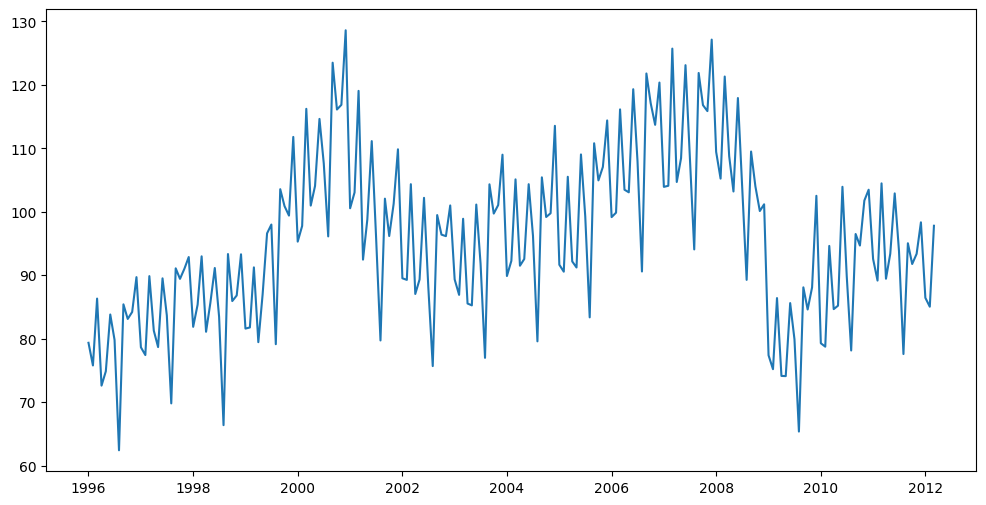

In [4]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [5]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [6]:
data.loc['1996-01-01']

,1996-01-01
Unnamed: 0,1.00
value,79.35


In [ ]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

# Moving average

In [7]:
#5-MA
data['MA'] = data['value'].rolling(window=5,center=True).mean()

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,77.782
1996-04-01,4,72.60,78.674
1996-05-01,5,74.86,79.478
1996-06-01,6,83.81,74.696
1996-07-01,7,79.80,77.258
1996-08-01,8,62.41,78.908
1996-09-01,9,85.41,78.988


In [9]:
#12-MA
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
1996-06-01,6,83.81,NaN
1996-07-01,7,79.80,79.750417
1996-08-01,8,62.41,79.789167
1996-09-01,9,85.41,80.005000


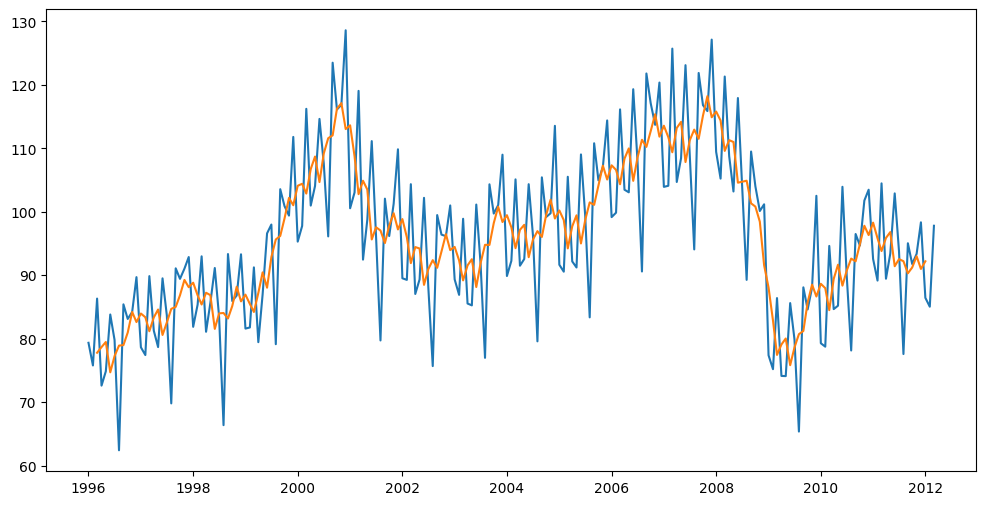

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

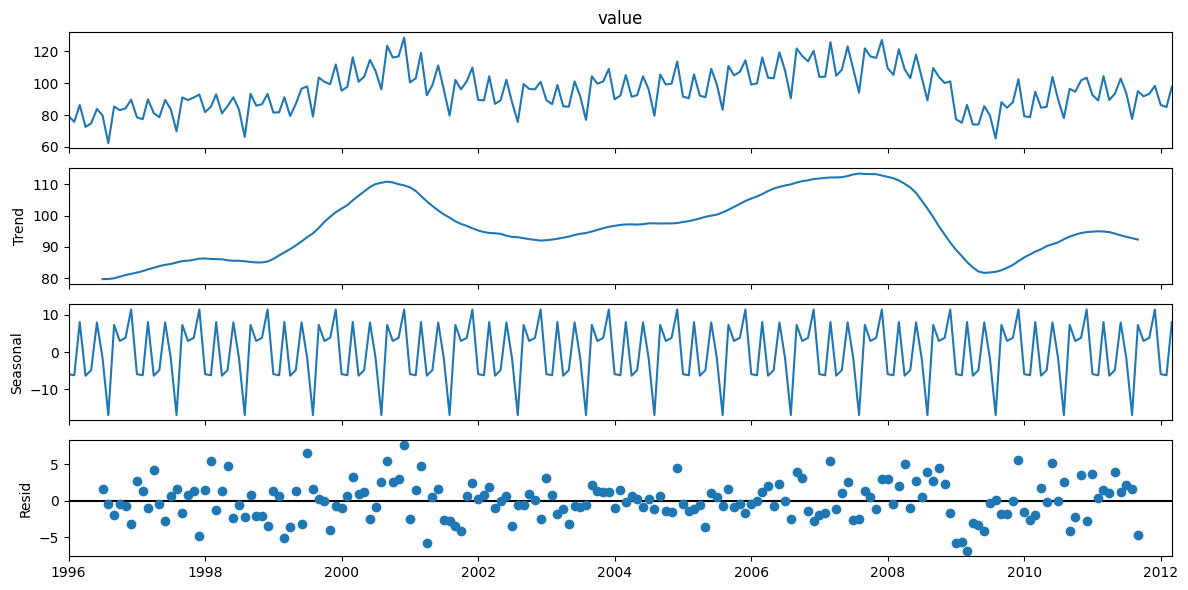

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive')

result_add.plot();

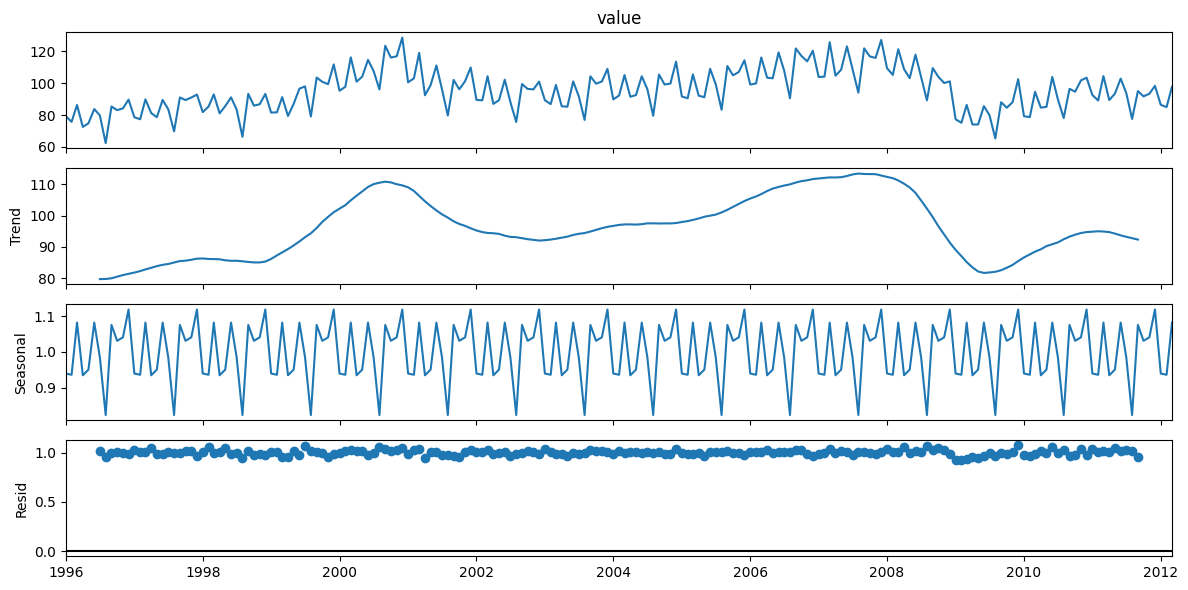

In [11]:
result_mul = seasonal_decompose(data['value'], model='multiplicative')

result_mul.plot();

### เรียกดูแต่ละส่วน

In [12]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: trend, Length: 195, dtype: float64
time
1996-01-01    -5.887662
1996-02-01    -6.199273
1996-03-01     8.083171
1996-04-01    -6.314968
1996-05-01    -4.818468
                ...    
2011-11-01     3.847366
2011-12-01    11.447504
2012-01-01    -5.887662
2012-02-01    -6.199273
2012-03-01     8.083171
Name: seasonal, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: resid, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [43]:
train_data = data.loc['1996-01-01':'2009-12-01']
test_data = data.loc['2010-01-01':'2012-03-01']

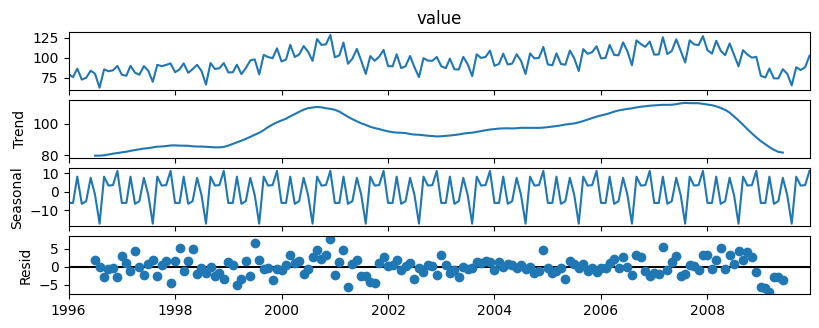

In [61]:
decomposition = seasonal_decompose(train_data['value'], model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = decomposition.plot()
fig.set_size_inches(8, 3)
plt.show()

In [47]:
last_year_seasonal = seasonal[-12:]
seasonal_forecast = pd.concat([last_year_seasonal] * 3)[:len(test_data)]
seasonal_forecast.index = test_data.index

last_year_trend_mean = trend[-12:].mean()
trend_forecast = pd.Series([last_year_trend_mean] * len(test_data), index=test_data.index)

y_pred = trend_forecast + seasonal_forecast

test_data['predicted'] = y_pred

test_data

/tmp/ipython-input-831409051.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted'] = y_pred


,Unnamed: 0,value,MA,predicted
time,,,,
2010-01-01,169,79.28,86.665417,78.795740
2010-02-01,170,78.74,87.613333,78.823657
2010-03-01,171,94.62,88.496250,92.964842
2010-04-01,172,84.66,89.266667,78.319169
2010-05-01,173,85.20,90.256667,79.740419
2010-06-01,174,103.94,90.866667,92.334586
2010-07-01,175,89.87,91.460417,83.140644
2010-08-01,176,78.14,92.448333,67.642695
2010-09-01,177,96.50,93.293333,92.960483


In [63]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_predSS
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

rmse_value = rmse(test_data['value'], test_data['predicted'])
print("RMSE =",rmse_value)

RMSE = 8.347917161058113


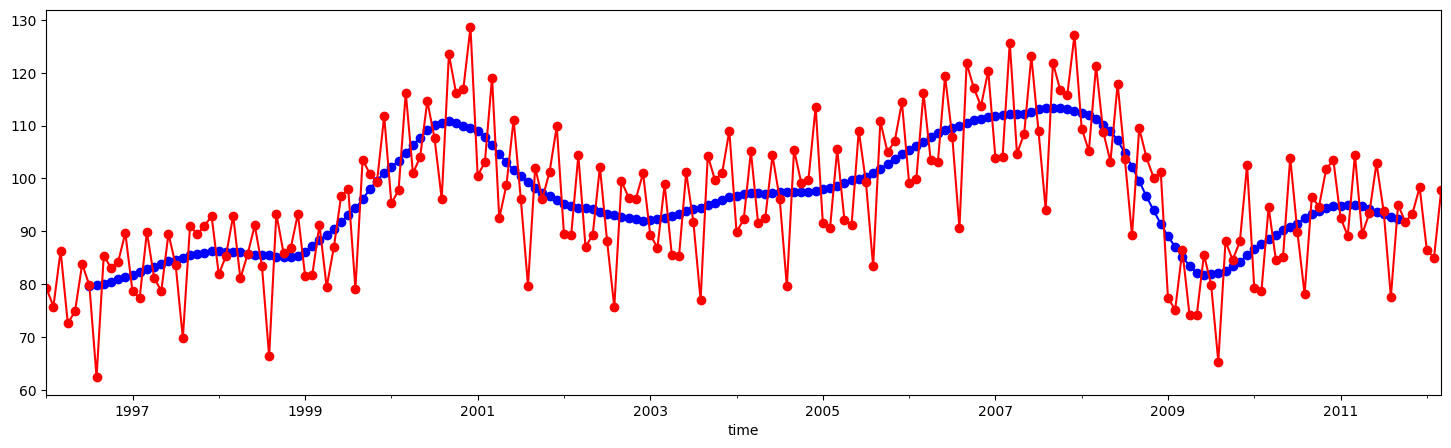

In [73]:
ax1 = result_add.trend.plot(marker='o', color='blue', figsize=(18,5))
ax2 = result_add.observed.plot(marker='o', color='red', figsize=(18,5))

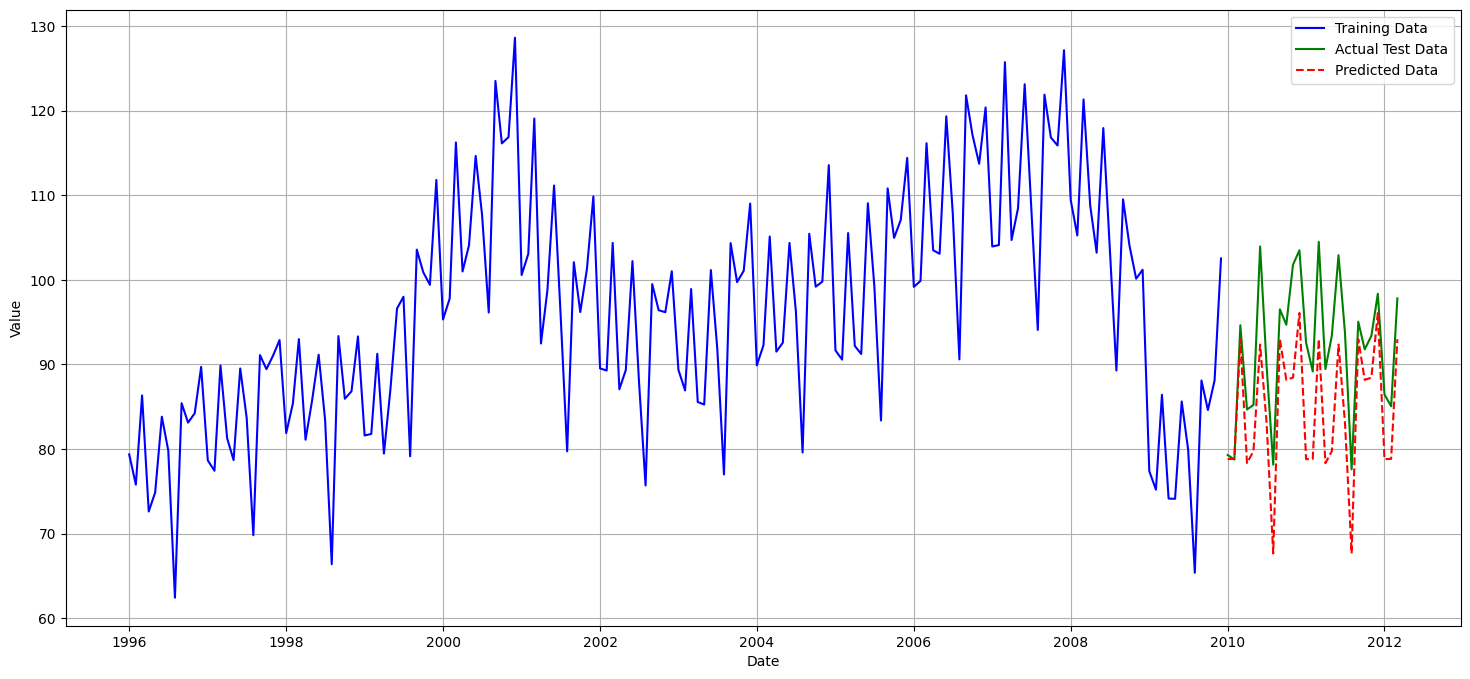

In [72]:
plt.figure(figsize=(18, 8))

plt.plot(train_data['value'], label='Training Data', color='blue')
plt.plot(test_data['value'], label='Actual Test Data', color='green')
plt.plot(test_data['predicted'], label='Predicted Data', color='red', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()